In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten,Input, Activation, Layer, Lambda, BatchNormalization
from keras.models import Sequential, Model
from keras import regularizers
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("covtype.csv")

In [3]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
dataset.shape

(581012, 55)

In [5]:
#check for null values
dataset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


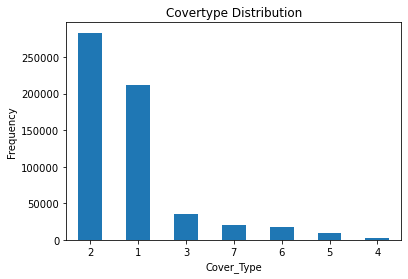

In [6]:
count_classes = pd.value_counts(dataset['Cover_Type'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Covertype Distribution")
plt.xlabel("Cover_Type")
plt.ylabel("Frequency")
plt.savefig("Covertype Distribution")
plt.show()

In [7]:
y = dataset.iloc[:,-1].values
x = dataset.drop(["Cover_Type"],axis=1)
x.shape,y.shape

((581012, 54), (581012,))

In [8]:
cov1 = dataset[dataset['Cover_Type']==1]
cov2 = dataset[dataset['Cover_Type']==2]
cov3 = dataset[dataset['Cover_Type']==3]
cov4 = dataset[dataset['Cover_Type']==4]
cov5 = dataset[dataset['Cover_Type']==5]
cov6 = dataset[dataset['Cover_Type']==6]
cov7 = dataset[dataset['Cover_Type']==7]
print(cov1.shape,cov2.shape,cov3.shape,cov4.shape,cov5.shape,cov6.shape,cov7.shape)

(211840, 55) (283301, 55) (35754, 55) (2747, 55) (9493, 55) (17367, 55) (20510, 55)


In [9]:
# Implementing Undersampling for Handling Imbalanced 
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res=nm.fit_sample(x,y)

In [10]:
X_res.shape,y_res.shape

((19229, 54), (19229,))

In [11]:
X_res

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2466,354,20,0,0,807,182,201,153,1463,...,0,0,1,0,0,0,0,0,0,0
1,2531,23,9,42,0,735,215,221,142,890,...,0,0,0,0,0,0,0,0,0,0
2,2533,36,4,30,0,750,220,230,147,860,...,0,0,0,0,0,0,0,0,0,0
3,2530,20,6,30,-3,742,216,228,149,875,...,0,0,0,0,0,0,0,0,0,0
4,2470,309,10,0,0,828,193,234,181,1455,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,3290,334,22,277,64,1905,163,204,177,467,...,0,0,0,0,0,0,0,0,1,0
19225,3284,47,24,808,188,1253,220,182,84,1816,...,0,0,0,0,0,0,0,0,0,1
19226,3412,328,38,277,152,1054,103,166,186,1577,...,0,0,0,0,0,0,0,0,1,0
19227,3271,286,12,342,113,930,186,240,194,2255,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X_res.to_numpy()

array([[2466,  354,   20, ...,    0,    0,    0],
       [2531,   23,    9, ...,    0,    0,    0],
       [2533,   36,    4, ...,    0,    0,    0],
       ...,
       [3412,  328,   38, ...,    0,    1,    0],
       [3271,  286,   12, ...,    0,    1,    0],
       [3395,   34,   10, ...,    0,    0,    1]], dtype=int64)

In [13]:
X_res.shape

(19229, 54)

In [14]:
#Feature Scaling
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_res)

In [15]:
#spliting the dataset into train and test set

x_train,x_test,y_train,y_test= train_test_split(x_scaled,y_res,test_size = 0.1, random_state = 0)
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(13844, 54)
(1923, 54)
(3462, 54)


In [17]:
input_data = Input(shape=(54,))
encoded = Dense(27, activation='relu')(input_data)
encoded = BatchNormalization()(encoded)
encoded = Dense(9, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(3, activation='relu')(encoded)

decoded = Dense(9, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(27, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(54, activation='sigmoid')(decoded)

In [18]:
autoencoder = Model(input_data, decoded)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 54)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 27)                1485      
_________________________________________________________________
batch_normalization_1 (Batch (None, 27)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 252       
_________________________________________________________________
batch_normalization_2 (Batch (None, 9)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 36  

In [19]:
history = autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=512,
                shuffle=True,
                validation_data=(x_val, x_val))

Train on 13844 samples, validate on 3462 samples
Epoch 1/1000
13844/13844 [==============================] - 1s 57us/step - loss: 0.2275 - val_loss: 0.2078
Epoch 2/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.2048 - val_loss: 0.1932
Epoch 3/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.1868 - val_loss: 0.1710
Epoch 4/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.1627 - val_loss: 0.1412
Epoch 5/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.1299 - val_loss: 0.1089
Epoch 6/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0954 - val_loss: 0.0815
Epoch 7/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0686 - val_loss: 0.0608
Epoch 8/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0508 - val_loss: 0.0486
Epoch 9/1000
13844/13844 [==============================] - 0s 10us/step - loss: 0.0407 - val_loss: 0.

13844/13844 [==============================] - 0s 8us/step - loss: 0.0116 - val_loss: 0.0116
Epoch 78/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0115 - val_loss: 0.0116
Epoch 79/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0115 - val_loss: 0.0115
Epoch 80/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0115 - val_loss: 0.0115
Epoch 81/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0114 - val_loss: 0.0114
Epoch 82/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0114 - val_loss: 0.0114
Epoch 83/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 84/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0112 - val_loss: 0.0113
Epoch 85/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0112 - val_loss: 0.0112
Epoch 86/1000
13844/13844 [========================

13844/13844 [==============================] - 0s 8us/step - loss: 0.0094 - val_loss: 0.0094
Epoch 154/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0094 - val_loss: 0.0094
Epoch 155/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0094 - val_loss: 0.0094
Epoch 156/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0094 - val_loss: 0.0093
Epoch 157/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0094 - val_loss: 0.0094
Epoch 158/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0093 - val_loss: 0.0097
Epoch 159/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0093 - val_loss: 0.0093
Epoch 160/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0093 - val_loss: 0.0094
Epoch 161/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0093 - val_loss: 0.0093
Epoch 162/1000
13844/13844 [===============

Epoch 229/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0084 - val_loss: 0.0086
Epoch 230/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0084 - val_loss: 0.0083
Epoch 231/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0083 - val_loss: 0.0083
Epoch 232/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0083 - val_loss: 0.0083
Epoch 233/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0083 - val_loss: 0.0083
Epoch 234/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0083 - val_loss: 0.0082
Epoch 235/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0083 - val_loss: 0.0082
Epoch 236/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0083 - val_loss: 0.0083
Epoch 237/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0083 - val_loss: 0.0082
Epoch 238/1000
13844/13844 [

13844/13844 [==============================] - 0s 10us/step - loss: 0.0079 - val_loss: 0.0078
Epoch 305/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0077 - val_loss: 0.0078
Epoch 306/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0075 - val_loss: 0.0076
Epoch 307/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0073 - val_loss: 0.0074
Epoch 308/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0075 - val_loss: 0.0090
Epoch 309/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0069 - val_loss: 0.0077
Epoch 310/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0070 - val_loss: 0.0083
Epoch 311/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0067 - val_loss: 0.0070
Epoch 312/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0068 - val_loss: 0.0072
Epoch 313/1000
13844/13844 [==============

Epoch 380/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0054 - val_loss: 0.0053
Epoch 381/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0054 - val_loss: 0.0054
Epoch 382/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0053 - val_loss: 0.0051
Epoch 383/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0052 - val_loss: 0.0051
Epoch 384/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 385/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0053 - val_loss: 0.0051
Epoch 386/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0053 - val_loss: 0.0052
Epoch 387/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0055 - val_loss: 0.0053
Epoch 388/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0054 - val_loss: 0.0051
Epoch 389/1000
13844/13844 [

Epoch 456/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0050 - val_loss: 0.0048
Epoch 457/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0049 - val_loss: 0.0049
Epoch 458/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0049 - val_loss: 0.0048
Epoch 459/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0050 - val_loss: 0.0048
Epoch 460/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0051 - val_loss: 0.0049
Epoch 461/1000
13844/13844 [==============================] - 0s 8us/step - loss: 0.0050 - val_loss: 0.0048
Epoch 462/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0048 - val_loss: 0.0048
Epoch 463/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0050 - val_loss: 0.0048
Epoch 464/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0049 - val_loss: 0.0048
Epoch 465/1000
13844/13844 [

Epoch 532/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0043 - val_loss: 0.0043
Epoch 533/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0043 - val_loss: 0.0041
Epoch 534/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0042 - val_loss: 0.0040
Epoch 535/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0042 - val_loss: 0.0040
Epoch 536/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0043 - val_loss: 0.0041
Epoch 537/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0042 - val_loss: 0.0041
Epoch 538/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0042 - val_loss: 0.0040
Epoch 539/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0042 - val_loss: 0.0039
Epoch 540/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0042 - val_loss: 0.0040
Epoch 541/1000
13844/13844 [

Epoch 608/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0041 - val_loss: 0.0038
Epoch 609/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 610/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 611/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 612/1000
13844/13844 [==============================] - 0s 10us/step - loss: 0.0040 - val_loss: 0.0037
Epoch 613/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0041 - val_loss: 0.0039
Epoch 614/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0040 - val_loss: 0.0037
Epoch 615/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0040 - val_loss: 0.0037
Epoch 616/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 617/1000
13844/13844 

Epoch 684/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0038 - val_loss: 0.0036
Epoch 685/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0038 - val_loss: 0.0039
Epoch 686/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0038 - val_loss: 0.0037
Epoch 687/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0037 - val_loss: 0.0036
Epoch 688/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0037 - val_loss: 0.0036
Epoch 689/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0038 - val_loss: 0.0035
Epoch 690/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0038 - val_loss: 0.0037
Epoch 691/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0038 - val_loss: 0.0036
Epoch 692/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0038 - val_loss: 0.0036
Epoch 693/1000
13844/13844 [

13844/13844 [==============================] - 0s 9us/step - loss: 0.0037 - val_loss: 0.0037
Epoch 760/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0035 - val_loss: 0.0035
Epoch 761/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0035 - val_loss: 0.0036
Epoch 762/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 763/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 764/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0036 - val_loss: 0.0033
Epoch 765/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 766/1000
13844/13844 [==============================] - 0s 10us/step - loss: 0.0035 - val_loss: 0.0033
Epoch 767/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0035 - val_loss: 0.0032
Epoch 768/1000
13844/13844 [==============

Epoch 835/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 836/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0034 - val_loss: 0.0031
Epoch 837/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 838/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 839/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 840/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 841/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 842/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0033 - val_loss: 0.0032
Epoch 843/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 844/1000
13844/13844 [

13844/13844 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 911/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 912/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 913/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0033 - val_loss: 0.0030
Epoch 914/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 915/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 916/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 917/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 918/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 919/1000
13844/13844 [===============

Epoch 986/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 987/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 988/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0028
Epoch 989/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 990/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 991/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 992/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0031 - val_loss: 0.0029
Epoch 993/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 0.0029
Epoch 994/1000
13844/13844 [==============================] - 0s 9us/step - loss: 0.0032 - val_loss: 0.0029
Epoch 995/1000
13844/13844 [

In [20]:
evaluation = autoencoder.evaluate(x_test, x_test)
print("Loss:",evaluation)

1923/1923 [==============================] - 0s 28us/step
Loss: 0.0028477486589118584


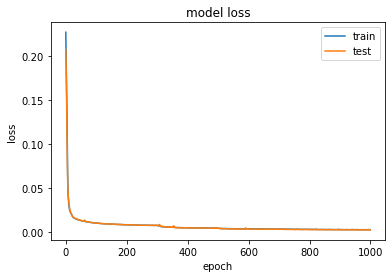

In [30]:
# Plot training loss and validation split loss over the epochs
#print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('deepAE_model_loss.png')
plt.show()

In [22]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)
data = autoencoder.predict(x_test)

1923/1923 [==============================] - 0s 27us/step
Loss: 0.0028477486589118584


In [23]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [24]:
latent_vector.shape

(1923, 3)

In [25]:
latent_vector

array([[0.28468496, 0.2544207 , 0.        ],
       [1.7384883 , 1.2316356 , 0.7869111 ],
       [1.7559707 , 0.17572919, 1.053305  ],
       ...,
       [0.21636158, 2.3535056 , 1.8158987 ],
       [0.59825206, 0.        , 0.05664364],
       [0.33141562, 2.5606399 , 1.963121  ]], dtype=float32)

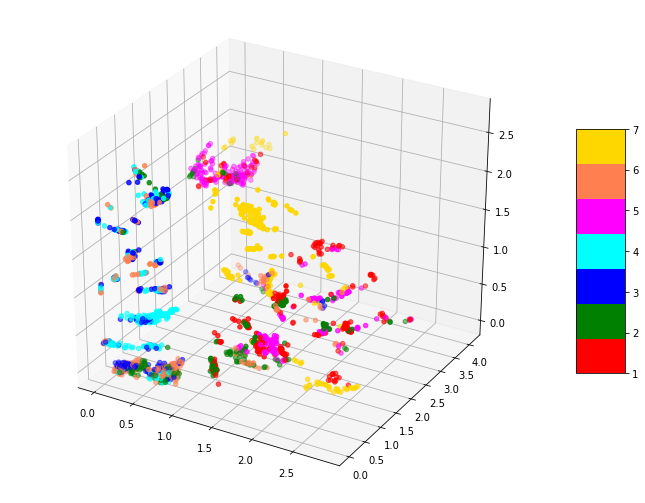

In [31]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','green','blue','cyan','magenta','coral','gold']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('deepAE_3d.png')
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.8013520540821633 and k :  [6]


In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.4784191367654706
Mean Squared Error: 1.4560582423296933
Root Mean Squared Error: 1.206672384008888
[[223  25   0   0  21   0   0]
 [ 11 220  12   2   7  17   0]
 [  0  17 181  35   0  34   0]
 [  0   9  46 185   0  26   0]
 [ 15   4   0   0 266   1   0]
 [  1  31  49  17   3 173   0]
 [  4   3   0   0   0   0 285]]
              precision    recall  f1-score   support

           1       0.88      0.83      0.85       269
           2       0.71      0.82      0.76       269
           3       0.63      0.68      0.65       267
           4       0.77      0.70      0.73       266
           5       0.90      0.93      0.91       286
           6       0.69      0.63      0.66       274
           7       1.00      0.98      0.99       292

    accuracy                           0.80      1923
   macro avg       0.80      0.79      0.79      1923
weighted avg       0.80      0.80      0.80      1923

